In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('output',axis =1),df['output'],test_size =0.20)

In [ ]:
LR = LogisticRegression()


In [ ]:
LR.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [ ]:
# making prediction on testing data
LR_y_pred = LR.predict(x_test)
# chking model accuracy
accuracy_score(y_test,LR_y_pred)

0.9016393442622951

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5)


In [ ]:
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
KNN_y_pred = KNN.predict(x_test)
accuracy_score(y_test,KNN_y_pred)

0.7213114754098361

In [ ]:
DT = DecisionTreeClassifier()


In [ ]:
DT.fit(x_train,y_train)
DT_y_pred = DT.predict(x_test)
accuracy_score(y_test,DT_y_pred)

0.8524590163934426

In [ ]:
# model with the best accuracy score

print('LogisticRegression accuracy score:-->',accuracy_score(y_test,LR_y_pred))
print('KNN accuracy score:-->',accuracy_score(y_test,KNN_y_pred))
print('Decision Tree accuracy score:-->',accuracy_score(y_test,DT_y_pred))

LogisticRegression accuracy score:--> 0.9016393442622951
KNN accuracy score:--> 0.7213114754098361
Decision Tree accuracy score:--> 0.8524590163934426


**6. Choose one of the algorithms that performed well and briefly discuss why it might be suitable for this specific problem.**

--> In our case LR is giving us the best accuracy score and also its suitable for the classification problems (In this case) & it is easy to understand algorithm.

**7. What are some potential ways to improve the performance of the chosen algorithm?**

*  Using more data
* Hyperparameter Tuning and other techniques



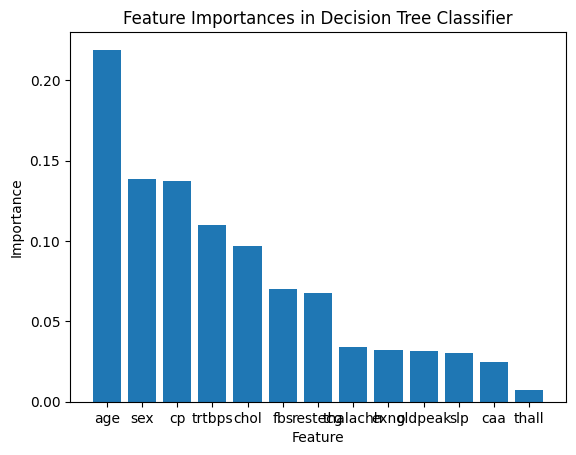

In [ ]:
feature_importances = DT.feature_importances_

# Sort the feature importances in descending order
feature_importances_sorted = np.sort(feature_importances)[::-1]

# Get the feature names
feature_names = df.drop('output', axis=1).columns

# Plot the bar chart
plt.bar(feature_names, feature_importances_sorted)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances in Decision Tree Classifier')
plt.show()